In [1]:
# Import all necessary libraries
import matplotlib
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
import random

%matplotlib inline

C:\Users\felipe.figueiredo\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\felipe.figueiredo\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\felipe.figueiredo\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
# Always reset the pseudo-random numbers generator to a known value so that your results are always the same.
np.random.seed(1234)

In [3]:
# Number of pairs feature/label.
N = 10000

In [4]:
# Input values (features)
x1 = np.random.rand(N, 1)
x2 = np.random.rand(N, 1)
x3 = np.random.rand(N, 1)

# True model.
y = x1 + x2 + x3

# Observable function.
y_noisy = y + np.random.randn(N, 1)

In [5]:
# Closed-form solution.
X = np.block([x1,x2,x3])

a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y_noisy))

yhat = X.dot(a_opt)
Joptimum = (1.0/N)*np.sum(np.power((y_noisy - yhat), 2))

In [6]:
class MyGD:
    
    maxEpochs = 0
    alpha = 0.1
    maxEpochs = 10000
    iteration = 0
    
    def __init__(self, alpha, maxEpochs):
        self.alpha = alpha
        self.maxEpochs = maxEpochs
        # Create empty structures.
        self.a_hist = np.zeros((3, self.maxEpochs))
        self.Jgd = np.zeros(self.maxEpochs)
        # Intialize the weights.
        self.a = np.array([-20.0, -20.0, -20.0]).reshape(3, 1)        
        
    def getResults(self):
        return self.a, self.Jgd, self.a_hist, self.iteration
    
    def get_params(self, deep):
        return {'alpha' : self.alpha}
    
    def set_params(self, **params):
        self.alpha = params['alpha']
    
    def score(self, X, y_noisy):
        N = len(y_noisy)
        yhat = X.dot(self.a)
        return (1.0/N)*sum(np.power(y_noisy - yhat, 2)) 

    def fit(self, X, y_noisy):
        # Calculate the error for the initial weights.
        N = len(y_noisy)
        yhat = X.dot(self.a)
        self.Jgd[0] = (1.0/N)*np.sum(np.power(y_noisy - yhat, 2))

        error = 1
        while(error > 0.001 and self.iteration < self.maxEpochs-1):

            # Hypothesis function.
            h = X.dot(self.a)

            # Calculate gradient vector.
            gradients = -(2.0/N)*X.T.dot(y_noisy - h)

            # Weight update rule.
            self.a = self.a - alpha*gradients

            # Store weight variation.
            self.a_hist[:, self.iteration+1] = self.a.reshape(3,)

            # Calculate and store actual error.
            yhat = X.dot(self.a)
            self.Jgd[self.iteration+1] = (1.0/N)*sum(np.power(y_noisy - yhat, 2))    

            # Error difference between actual and previous iteration.
            error = np.abs(self.Jgd[self.iteration]-self.Jgd[self.iteration+1])   

            self.iteration += 1

In [7]:
# Gradient-descent solution.
maxEpochs = 10000

alphas = [0.001, 0.01, 0.1, 1.0]

interations = []
scores = []
for i in range(0,len(alphas)):
    alpha = alphas[i]
    gd = MyGD(alpha, maxEpochs)
    gd.fit(X, y_noisy)
    scores.append(gd.score(X, y_noisy))
    interations.append(gd.iteration)

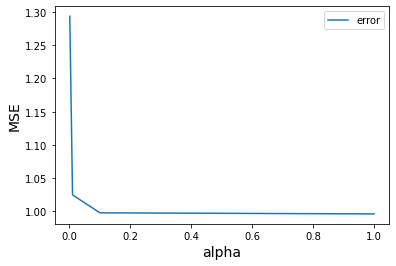

In [8]:
plt.plot(alphas, scores, label='error')
plt.xlabel('alpha', fontsize=14)
plt.ylabel('MSE', fontsize=14)
plt.legend()
plt.show()

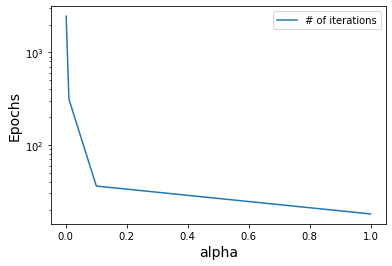

In [9]:
plt.plot(alphas, interations, label='# of iterations')
plt.xlabel('alpha', fontsize=14)
plt.ylabel('Epochs', fontsize=14)
plt.yscale('log')
plt.legend()
plt.show()

In [10]:
# Gradient-descent solution.
maxEpochs = 10000

alphas = [0.5, 0.6, 0.7, 0.8, 0.9, 1]

interations = []
scores = []
for i in range(0,len(alphas)):
    alpha = alphas[i]
    gd = MyGD(alpha, maxEpochs)
    gd.fit(X, y_noisy)
    scores.append(gd.score(X, y_noisy))
    interations.append(gd.iteration)

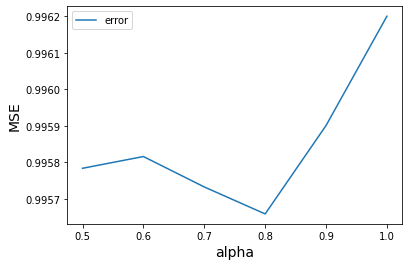

In [11]:
plt.plot(alphas, scores, label='error')
plt.xlabel('alpha', fontsize=14)
plt.ylabel('MSE', fontsize=14)
plt.legend()
plt.show()

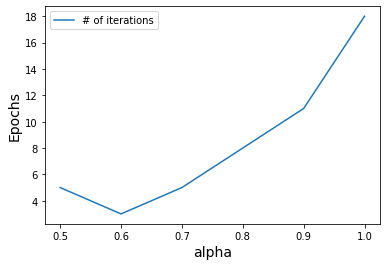

In [12]:
plt.plot(alphas, interations, label='# of iterations')
plt.xlabel('alpha', fontsize=14)
plt.ylabel('Epochs', fontsize=14)
plt.legend()
plt.show()